# Tarea 2 Machine learning

## Integrantes
Gabriel Molina
18-394-302-8

Ignacio Norambuena
Tu Rol

## 1. Tipos de fronteras en Clasificación
Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.

Éste dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:

In [1]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from __future__ import print_function

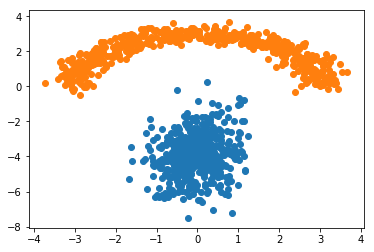

In [20]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
plt.scatter(datos1[:,0], datos1[:,1])
plt.scatter(datos2[:,0], datos2[:,1])
plt.show()

(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada conjunto y visualícelos.

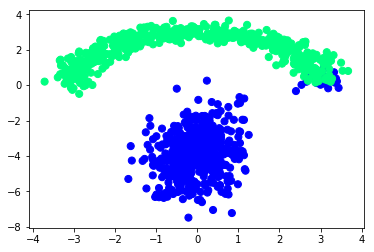

In [21]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()

## Nota:
Como se puede notar, se agrego ruido intencionalmente para simular datos mas proximos a la realidad, ya que nunca se encontrara datos sin ruido o complemtanente separados

Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:

In [22]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()
models = []

(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.

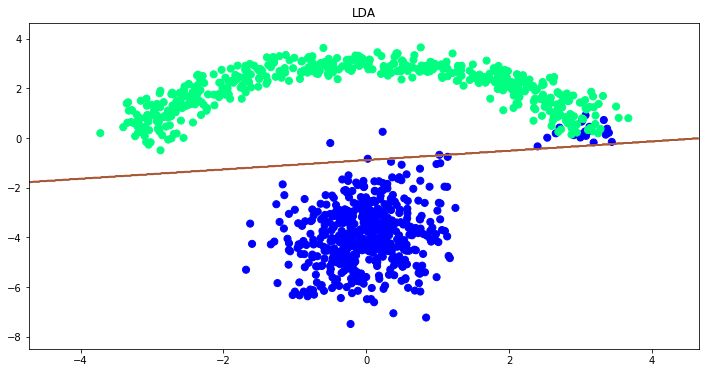

In [23]:
model = LDA()
model.fit(X,y)
yhat_LDA = model.predict(X)
visualize_border(model,X,y,"LDA")
models.append(model)

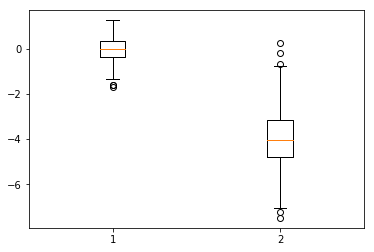

In [24]:
plt.boxplot(datos1)
plt.show()

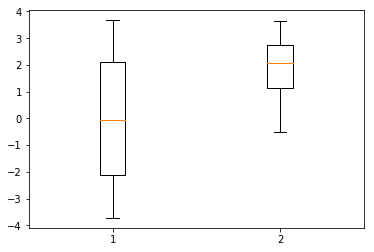

In [25]:
plt.boxplot(datos2)
plt.show()

## Respuesta
A pesar de que el hyperplano logra separar la gran mayoria de los datos de ambos conjuntos, se puede notar la existencia de datos del conjunto 1 (azul) en el conjunto 2 (verde), por lo cual la separacion completa mediante LDA es imposible a menos que trabajemos los datos de una forma mas abrupta, lo cual seria la eliminacion de outliers (facilmente visibles tanto en el grafico de dispresion como en los boxplot) pero se tiene que tener cuidado de esto, ya que la informacion mas valiosa puede existir en los outliers y al eliminarlos perdemos una parte importante de informacion del conjuntos.

(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?


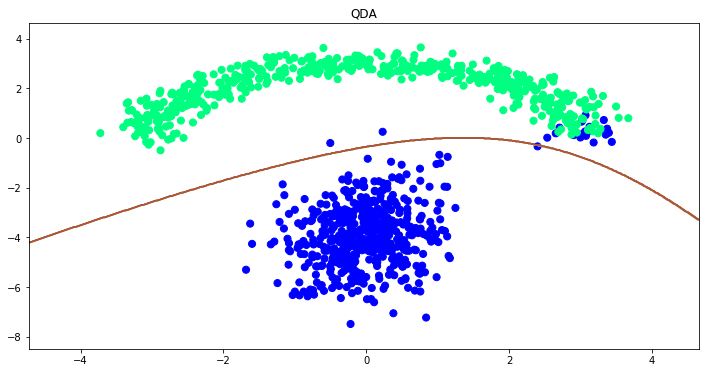

In [26]:
model = QDA()
model.fit(X,y)
yhat_QDA = model.predict(X)
visualize_border(model,X,y,"QDA")
models.append(model)

## Respuesta
QDA se asemeja a LDA ya que no puede separar completamente los datos de ambos cojuntos, tambien a pesar de que la curva de division es distinta (ya que usa metodos cuadraticos) la cantidad de puntos es extremadamente similar (quedando mejor clasificado 1 o 2 puntos con QDA) por lo cual no existe mucha diferencia en el clasificador.
Por otro lado, por simple inspeccion visual QDA se ajusta mejor a la forma del conjunto de datos 2 (verde) por lo cual mi clasificador tendera a tener un poco mas overfitting (muy poco) ya que QDA prioriza la separacion en la concentracion mas grande de datos, a diferencia de LDA que traza una recta intentando dividir el espacio de ambos conjuntos por "la mitad". Pero gracias a este trade off, se tiene un clasificador mejor al momento de ingresarle datos nuevos o comprobarlo con datos de testing

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.

In [27]:
y_pred_QDA = yhat_QDA
y_pred_LDA = yhat_LDA
y_true = y
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_QDA)))
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_LDA)))

Miss Classification Loss QDA: 0.021000
Miss Classification Loss LDA: 0.024000


## Respuesta
Como se puede ver, QDA tiene un mejor desempeño que LDA, esto ocurre por que QDA se adapta mejor al espacio intermedio con forma ovalada, clasificamendo mejor ciertos puntos que quedan fuera si trazamos una linea recta divisora. Todo esto viene de la mano con el incremento del costo computacional de QDA ademas del peligro de tener un incremento del overfitting al ajustar la curva divisora a la forma del conjunto de datos 2 (verde)

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.


In [28]:
def visualize_border_interactive(param):
    model,yhat = train_model(param)
    visualize_border(model,X,y)
    print("Error de Clasificación: %f"%(1-accuracy_score(y_true, yhat)))


(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

In [29]:
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    models.append(model)
    model.fit(X,y)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

A Jupyter Widget

### Respuesta

La regresion logistica aplicada a la norma l2 penaliza los datos segun la regla de Lasso, lo cual significa que a medida que disminuimos el parametro (ya que la funcion trabaja con el inverso del parametro, es decir, a mayor C, menor es la regularizacion), mas grande es la penalizacion, esto permite que el modelo se ajuste de mejor forma quitandole importancia a los datos que influyen poco al modelo. En la pantalla interactiva se denota que el modelo se ajusta hasta un valor maximo del parametro igual a un valor de 0.6 ya que despues de esto el error de clasificacion aumenta, por lo cual en este punto se tiene un error de entrenamiento minimo con un ajuste ideal, permitiendo tener una maquina sin mucho overfitting.

(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [30]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    models.append(model)
    model.fit(X,y)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 5
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

A Jupyter Widget

### Respuesta
Ya que SVM se encarga de maximizar la minima distancia entre cada uno de los datos y el hyperplano, por lo cual el parametro cumple el mismo objetivo que la norma l2 del ejercicio anterior (penalizar los valores quitandole importancia a los datos que aportar poco al modelo) por lo cual le dice a SVM que datos mal clasificados quiere ignorar al definir el hyperplano por lo cual despues de que C = 0.57 mi error de clasificacion aumenta, ademas si C llega a 4 (a causa de que la funcion toma el inverso del parametro, lo cual indica que pasado este valor no se regulariza para nada), la pendiente del hyperplano no varia notablemente, manteniendose el error de clasificacion.
Por lo cual, actua de la misma forma que Regresión Logística Regularizado con norma l2, ya que al igual que el ejercicio anterior, su parametro de error minimo se encuentra muy aproximado al valor del parametro de la regresion logistica (0.6).
Esto define una maquina con su ajuste ideal.

(g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.

In [31]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

In [32]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 1000000
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

In [33]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

## Respuesta
1. Polynomial: Este kernel hace que el parametro C ajuste el polinomio de la separacion optima de ambos conjuntos de datos (Video que explica visualmente muy bien este kernel: https://www.youtube.com/watch?v=3liCbRZPrZA). Para este kernel el punto optimo donde se diminuye el error es C = 0.7 lo cual se visualiza que es un buen candidato ya que deja espacio para disminuir el overfitting, ademas, pasado un parametro C = 2.07, el error no disminuye pero el hyperplano cambia, dejando distintos modelos para evitar el overfitting.
2. Radial Basic Function: Este kernel encierra el conjunto de datos comparandolos uno por uno y el parametro C castiga el radio de estas separaciones, por lo cual al aumentar el parametro C el modelo normalmente tendera a tener menor error ya que al trabajar con el inverso del valor C (a mayor C menor es la penalisación), pero incrementara considerablemente el overfitting ya que se estara ajustando muy perfectamente a los datos de entrenamiento.
3. Sigmoid: El kernel de Sigmoid o de tangente hyperbolica viene del modelo de las redes neuronales, el cual se denota por la siguiente formula $$k(x, y) = tanh (\alpha x^T y + c)$$ Lamentablemente como no estamos trabajando con redes neuronales, el error de clasificacion es bastante alto en comparacion al resto de los kernels, ademas de que a medida que se aumenta el parametro C se tiene hyperplanos extraños que no van al modelo.
4. Linear: Se trabajo con el en la pregunta anterior



(h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar 
el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.

In [34]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

In [35]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

## Respuesta
Para este ejercicio, se utilizaron el modelo de impureza de Gini y el de ganancia de informacion (Entropy), el parametro C simboliza cuantas separaciones se tendran en el modelo de arbol de desicion el cual permite una mayor profundizacion del arbol dependiendo de su valor.
para ambos modelos, cuando la profundidad maxima del arbol es igual a 11 se tiene un 0% de error de clasificaciones, lo cual significa que se logra separar completamente ambos conjuntos de datos, pero esto no significa que la maquina sea ideal, ya que como se puede ver visualmente la separaciones es muy estrecha en los datos verdes, lo cual significa que el modelo esta sumamente overfiteado lo cual podria tener efectos horribles al ingresar datos nuevos.

(i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

In [36]:
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    models.append(model)
    model.fit(X,y) 
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

## Respuesta
La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los k ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados.
KNN busca localmente los K vecinos mas cercanos, lo cual se define mediante el parametro. Para este caso, con solamente tomar K=1 se tiene un error de clasficicacion del 0% lo que demuestra el exito de mi separacion y si el parametro K aumenta de valor, este incrementando mi error de clasficacion hasta un 2%, por lo cual para evitar el overfitting causado por k=1 se deberia aumentar el valor de K hasta tener un modelo con un error de clasificacion relativamente bueno pero que visualmente deje espacio para nuevos datos (disminuya el overfitting). En este caso, el valor k = 18 deja una division con un error de clasificacion bastante bajo, ademas de que mantiene en "el medio del hyperplano" datos de ambos conjuntos, lo cual disminuye considerablemente el overfitting.

### Comparación de modelos

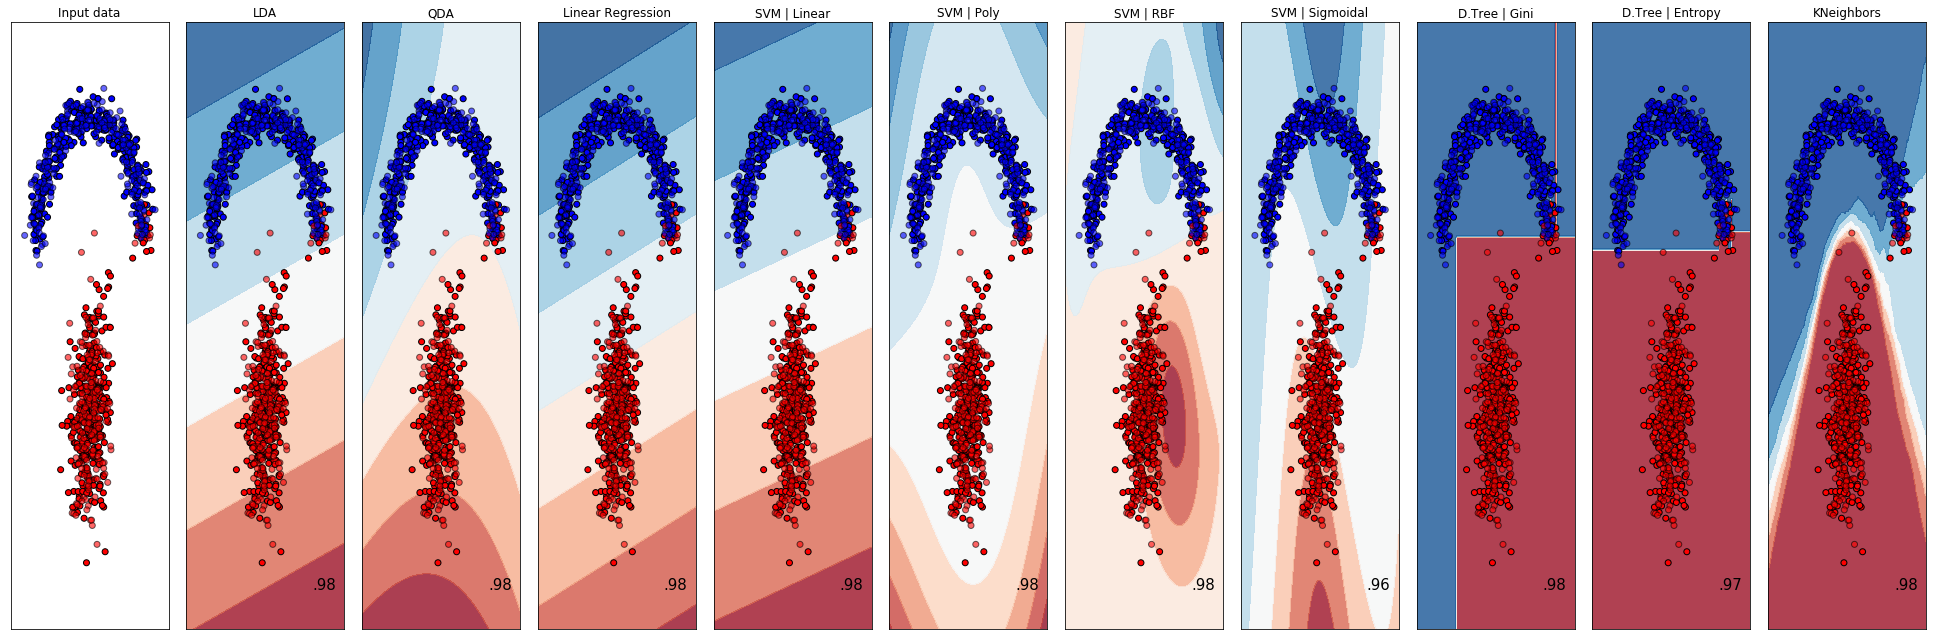

In [37]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def compare(X, y, classifiers):
    h = .02  # step size in the mesh
    
    names = ["LDA", "QDA", "Linear Regression", "SVM | Linear",
    "SVM | Poly", "SVM | RBF", "SVM | Sigmoidal", "D.Tree | Gini",
    "D.Tree | Entropy", "KNeighbors"]
    
    datasets = [(X,y)]
    
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)
    
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()  

compare(X,y,models)

# 2. Análisis de audios como datos brutos


In [2]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pylab 
import scipy.stats as stats
from mpl_toolkits.axes_grid.inset_locator import inset_axes

%matplotlib inline

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [39]:
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


(a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.


In [40]:
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [41]:
df['label'].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

Como se puede apreciar:
1. el dataset cuenta con 176 filas y 4 columnas
2. "dataset" representa el dataset (a o b) al cual corresponde el dato
3. "fname" es el nombre del archivo de audio al cual corresponde el dato
4. "label" corresponde a la etiqueta a la cual corresponde el dato, en los cuales puede ser normal, artifac, extrahis, murmur o puede venir sin clasificar
5. "sublabel" columna que no contiene información

Las etiquetas significan lo siguiente:

1. Normal: Sonido Normal del corazón
2. Murmur: Corresponde a un soplo el cual se reconoce por sonidos turbulentos
3. artifac: Variedad de sonido que en el cual no necesariamente se escuchan sonidos cardiacos, ej: silbidos, llantos
4. extrahis: Sonido extra aparte del corazón 

Por ultimo, la cantidad de datos en cada etiqueta es:

    unlabel     52
    artifact    40
    murmur      34
    normal      31
    extrahls    19

In [42]:
df.drop(['dataset','sublabel'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

(b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

In [43]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


## Dato
Para poder analisar una secuencia de audio, al igual que los datos en matrices multidimensionales, los datos deben estar en la misma escala, es decir, estandarizar los datos, por lo cual el padding de 0 estandariza los datos haciendo que todos tengan el mismo tamaño de serie de tiempo, facilitando los trabajos futuros.

(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

In [44]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64

artifacts:


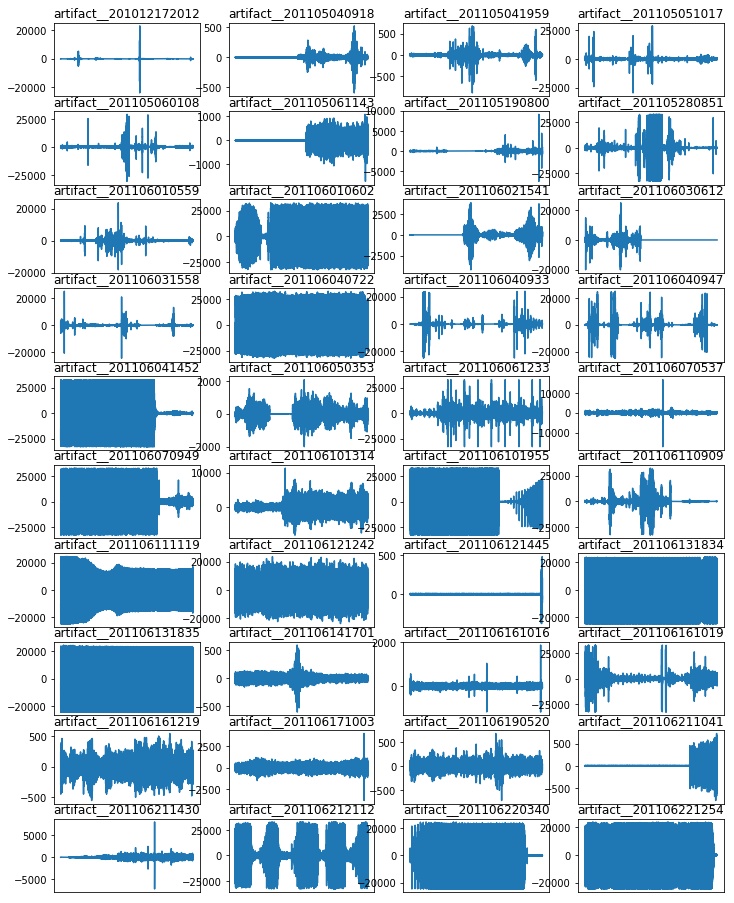

In [45]:
print("artifacts:")
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(new_df['time_series'][i])
    ax[i//4, i%4].set_title(new_df['file_name'][i][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

extrahls:


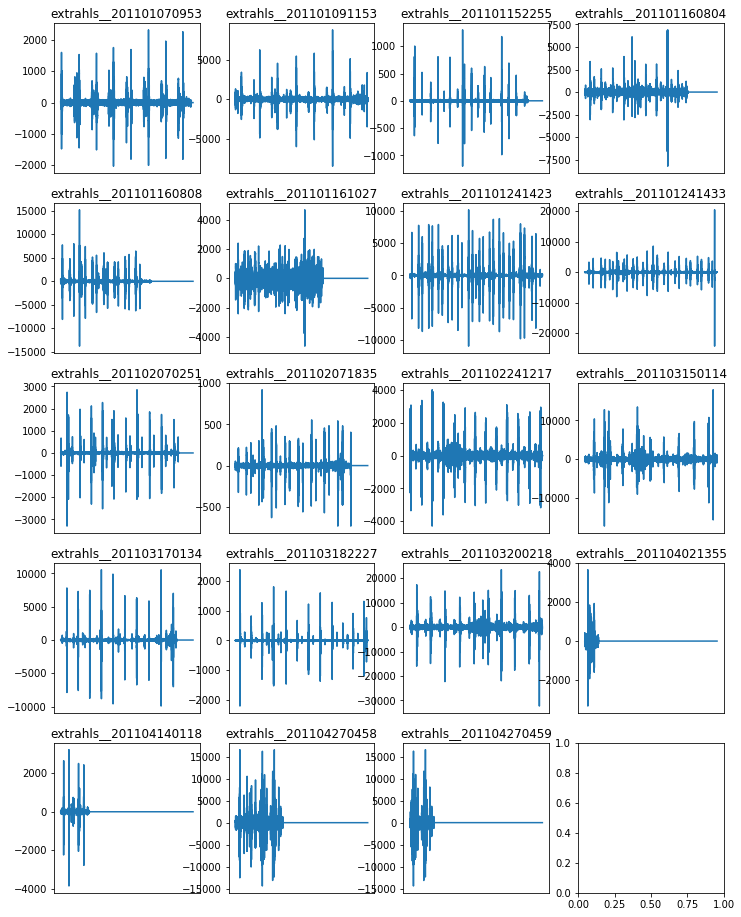

In [46]:
print("extrahls:")
fig, ax = plt.subplots(5, 4, figsize = (12, 16))
for i in range(19):
    ax[i//4, i%4].plot(new_df['time_series'][i+40])
    ax[i//4, i%4].set_title(new_df['file_name'][i+40][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

murmur


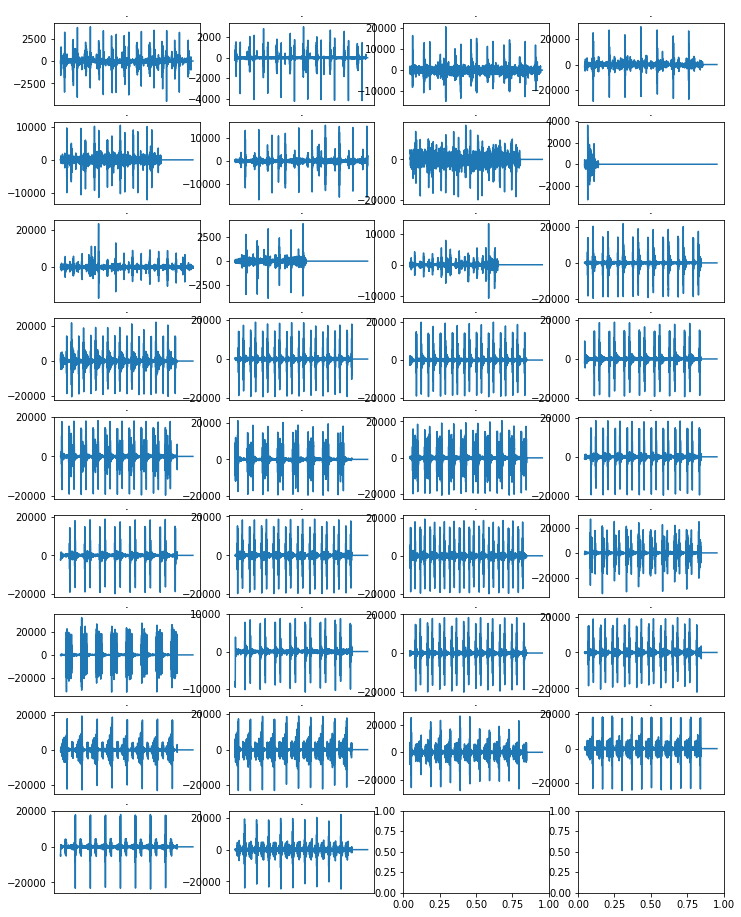

In [47]:
print("murmur")
fig, ax = plt.subplots(9, 4, figsize = (12, 16))
for i in range(34):
    ax[i//4, i%4].plot(new_df['time_series'][i+59])
    ax[i//4, i%4].set_title(new_df['file_name'][i+59][-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

normal


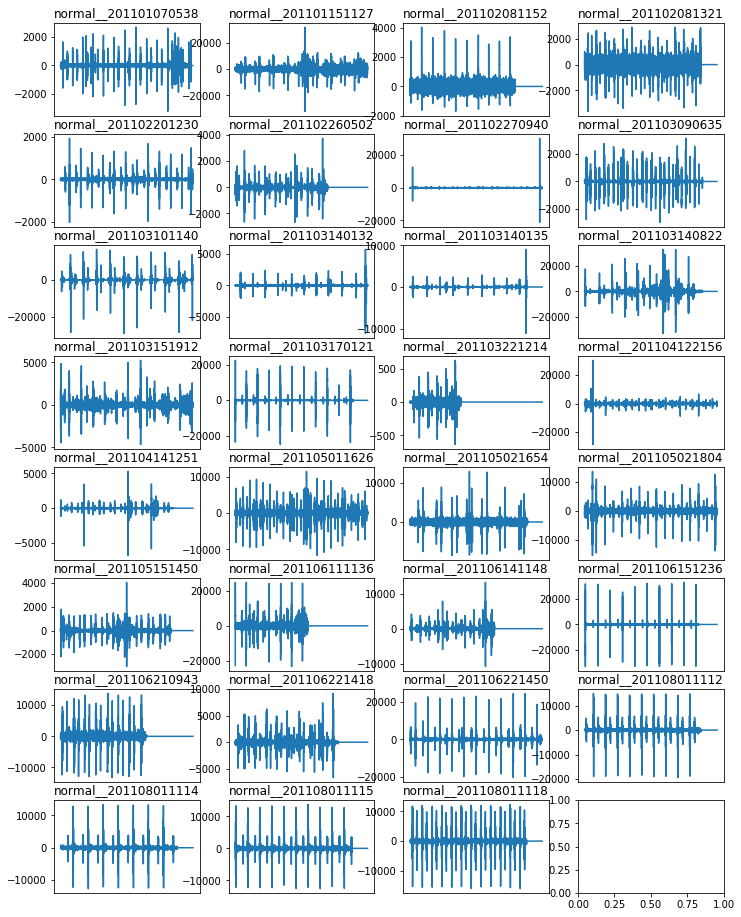

In [48]:
print("normal")
fig, ax = plt.subplots(8, 4, figsize = (12, 16))
for i in range(31):
    ax[i//4, i%4].plot(new_df['time_series'][i+93])
    ax[i//4, i%4].set_title(new_df['file_name'][i+93][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

unclassified


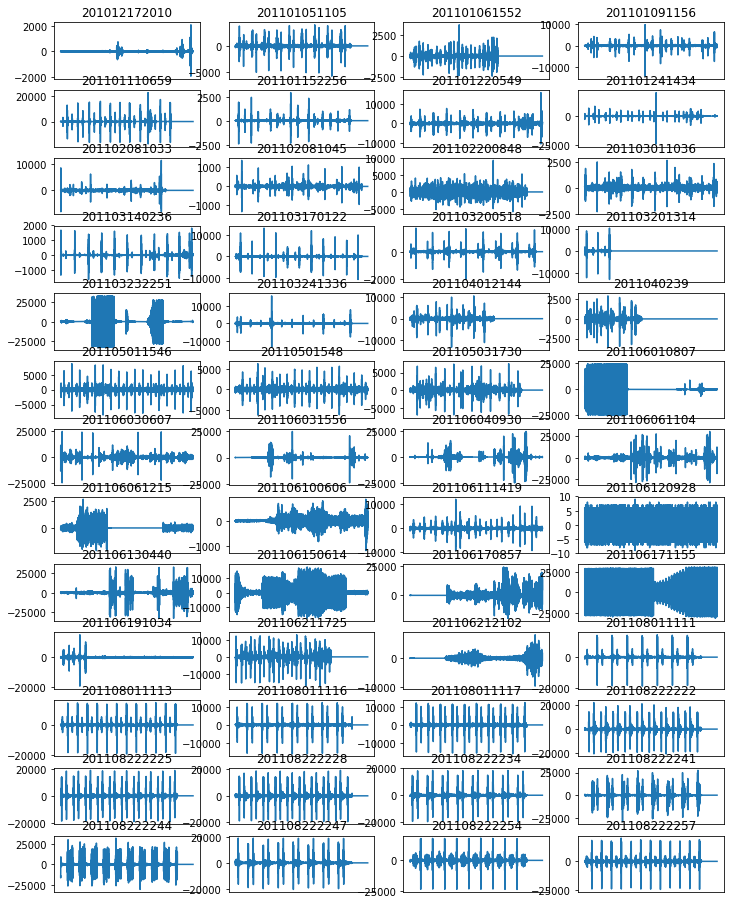

In [49]:
print("unclassified")
fig, ax = plt.subplots(13, 4, figsize = (12, 16))
for i in range(52):
    ax[i//4, i%4].plot(new_df['time_series'][i+124])
    ax[i//4, i%4].set_title(new_df['file_name'][i+124][17:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

Como se puede observar, se tiene normal/extrahls, artifact y murmur tienen 65, 58 y 53 entradas por clase correspondientemente. Cuando se tiene datos mal clasificados, la maquina tiene aprender cosas que no tienen sentido, afecta la precision de mi maquina. Ademas, si tengo suficientes datos y mi modelo es robusto a la existencia de "Label Noise" 1 solo dato mal etiquetado no deberia causar muchos problemas en el aprendizaje de mi maquina, por otro lado, si mi modelo no es robusto ante este ruido, es decir, no tengo adaptado al modelo para que permita los errores de etiquetado en los datos de entrenamiento, 1 solo dato mal etiquetado en la combinacion de una cantidad no muy amplia de datos de entrenamiento, puede afectar considerablemente mi maquina.
Esto se puede solucionar generando un modelo resistente a los errores de etiquetado o el metodo mas comun es que manualmente se depuran los datos mal etiquetados, ya sean dandole su etiqueta correcta, haciendo un sistema de votos en comunidad o borrando el dato.
En este ejemplo, todos los datos fueron re etiquetados por un experto, esto tiene un problema, la maquina al ser entrenada con datos mejor etiquetados, podra tener un mejor resultado pero la maquina posiblementa obtenga un gran overfitting ya que los datos de entrenamiento estaran cesgados a la vista de este experto y al momento de ingresar datos nuevos esto puede generar un gran error de clasificación.

(d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


In [50]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


2    65
0    58
1    53
Name: target, dtype: int64

Como se denota en la informacion del data set, los valores de normal/extrahls, artifact, murmur fueron cambiados a los valores numeros 2, 0 y 1 respectivamente


(e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?


In [51]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

Al tener los datos sin su pre-procesamiento se tienen los siguientes problemas:

1. Al tener los datos en diferentes  amplitudes de tiempo se genera problema al trabajar con los datos, ya que al no tenerlos en la misma escala no podre ajustar mi modelo correctamente y el trabajo futuro se vuelve muy complicado.
2. Las diferentes dimensiones implica caer en la maldición de la dimensionalidad, la cual tiene varios factores, algunos de ellos son la perdida de la noción de distancia, la complejidad humana de pensar en soluciones en mas de 3+1 dimensiones, etc

(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.


In [52]:
X_fourier = np.abs(np.fft.fft(X))
X

array([[  -85.,  -198.,  -214., ...,  -110.,   -74.,   -76.],
       [   96.,    90.,    84., ...,     0.,     0.,     0.],
       [  220.,   191.,   171., ...,     0.,     0.,     0.],
       ..., 
       [  376.,   413.,   429., ...,     0.,     0.,     0.],
       [ -404.,  -442.,  -456., ...,     0.,     0.,     0.],
       [-2169., -2661., -1605., ...,   435.,   373.,   417.]])

(g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


In [53]:
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

In [54]:
X_trainFULL, X_testFULL, y_trainFULL, y_testFULL = train_test_split(X_fourier, y,test_size=0.25, random_state=42)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [56]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_trainFULL)
X_trainFULL = std.transform(X_trainFULL)
X_testFULL = std.transform(X_testFULL)

In [57]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [58]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

In [59]:
d=2
pca_modelFULL = PCA(n_components=d)
pca_modelFULL.fit(X_trainFULL)
X_pca_trainFULL = pca_modelFULL.transform(X_trainFULL)
X_pca_testFULL = pca_modelFULL.transform(X_testFULL)

### Respuesta
Existen muchas formas para verificar si el conjunto es representativo, en estos momentos utilizaremos una forma visual de comparación. para este caso analizaremos las curvas de error al entrenar una maquina de Regresión Logistica con penalización l2, SVM con kernel lineal y SVM con kernel rbf para el conjunto de datos completos y lo compararemos con el conjunto de datos reducido (que se muestra en los siguientes ejercicios), ademas podremos ver el ploteo del conjunto de datos total al reducirlos con PCA a 2 dimensiones y tambien lo compararemos con el conjunto reducido.
Al final de analizar estos datos, se muestra visualmente que ambos modelos siguen el mismo comportamiento al usarlos de entrenamiento para las distintas maquinas, ambas maquinas tienen curvas sumamente similares al jugar con un parametro regularizador y al graficar los datos se observan comportamientos similares, por ejemplo que la mayoria de los datos esta sumamente centrado en el 0.
Otro punto positivo de esta parte de la tarea es que podemos graficar los errores de entrenamiento y testing de ambos conjuntos (completo y reducido) y podemos observar que con el subconjunto, se tiene un mayor error en la clasificación, pero por otro lado, se puede estimar que con el subconjunto se generaliza mas la maquina entrenada, permitiendo una ventana mas grande a los datos que ingresen a futuro.
Otro detalle es que los algoritmos que usan el dataset completo tardan mucho mas en graficar la solución

(h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [61]:
X_train.shape

(132, 100000)

In [62]:
X_test.shape

(44, 100000)

In [63]:
print("El conjunto de entrenamiento tiene " + str(len(X_train)) + ' datos')
print('El conjunto de entrenamiento prueba ' + str(len(X_test)) +' datos')
print('Ambos conjuntos de entrenamiento cuenta con 100000 dimensiones')

El conjunto de entrenamiento tiene 132 datos
El conjunto de entrenamiento prueba 44 datos
Ambos conjuntos de entrenamiento cuenta con 100000 dimensiones


(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [64]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

(j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.


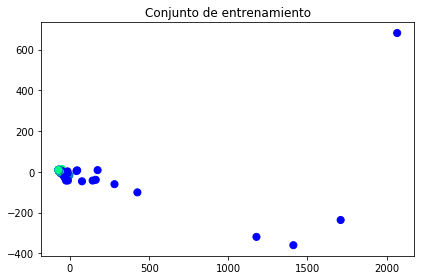

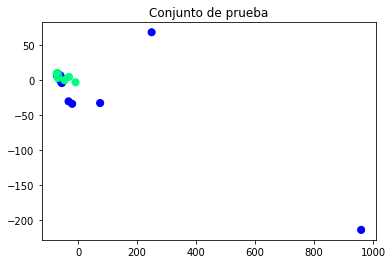

In [65]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

plt.scatter(X_pca_train[:,0] , X_pca_train[:,1], s=50, c=y_train, cmap=plt.cm.winter)
plt.title('Conjunto de entrenamiento')
plt.tight_layout()
plt.show()

plt.scatter(X_pca_test[:,0] , X_pca_test[:,1], s=50, c=y_test, cmap=plt.cm.winter)
plt.title('Conjunto de prueba')
plt.show()


# Diferentes Zooms al Dataset Reducido

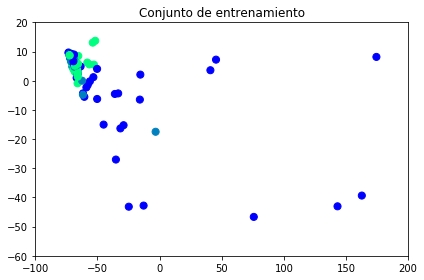

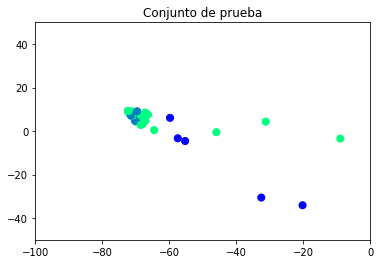

In [66]:
plt.scatter(X_pca_train[:,0] , X_pca_train[:,1], s=50, c=y_train, cmap=plt.cm.winter)
plt.title('Conjunto de entrenamiento')
plt.axis([-100,200,-60,20])
plt.tight_layout()
plt.show()

plt.scatter(X_pca_test[:,0] , X_pca_test[:,1], s=50, c=y_test, cmap=plt.cm.winter)
plt.axis([-100,0,-50,50])
plt.title('Conjunto de prueba')
plt.show()

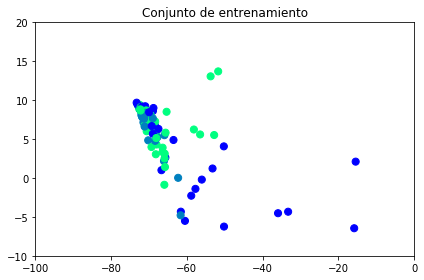

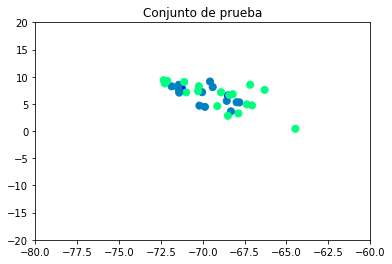

In [67]:
plt.scatter(X_pca_train[:,0] , X_pca_train[:,1], s=50, c=y_train, cmap=plt.cm.winter)
plt.title('Conjunto de entrenamiento')
plt.axis([-100,0,-10,20])
plt.tight_layout()
plt.show()

plt.scatter(X_pca_test[:,0] , X_pca_test[:,1], s=50, c=y_test, cmap=plt.cm.winter)
plt.axis([-80,-60,-20,20])
plt.title('Conjunto de prueba')
plt.show()

(k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango
que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.

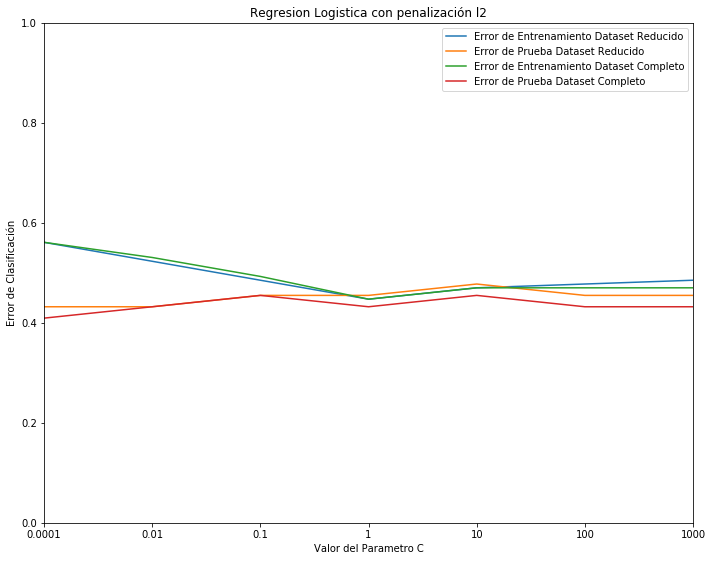

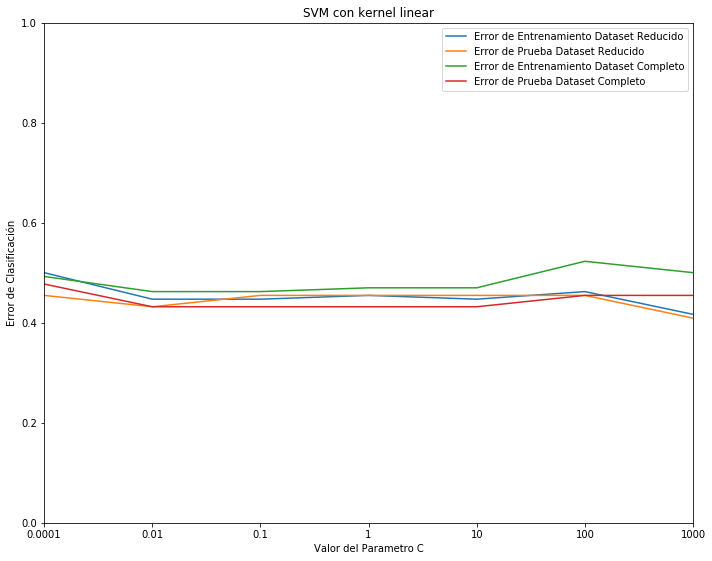

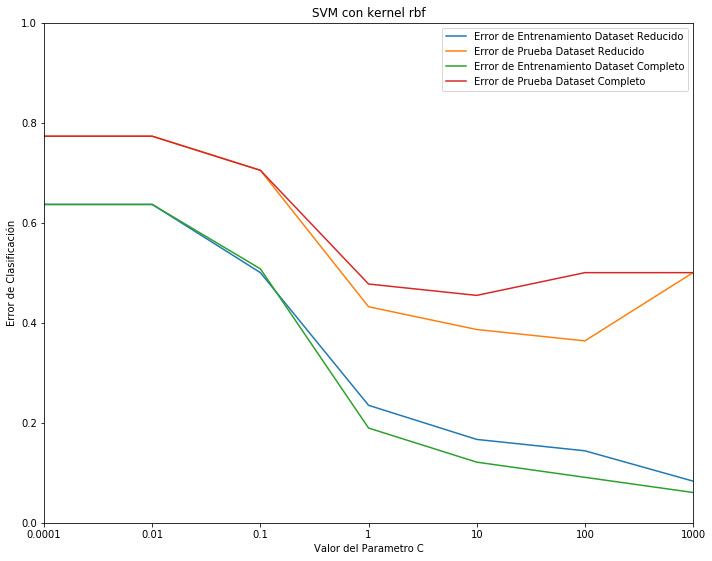

In [68]:
def ploteo_k(Cs, modelo,X_pca_train,X_pca_test,y_train,y_test,kernel): 
    error_train = []
    error_test = []
    error_trainFULL = []
    error_testFULL = []
    
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
        if(modelo == 1):
            model=LR()
            model.set_params(C=param,penalty='l2')
            model.fit(X_pca_train,y_train)
            
            modelFULL=LR()
            modelFULL.set_params(C=param,penalty='l2')
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        if(modelo ==2):
            model = SVM()
            model.set_params(C=param,kernel=kernel)
            model.fit(X_pca_train,y_train)
            
            modelFULL = SVM()
            modelFULL.set_params(C=param,kernel=kernel)
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))

    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(pasos, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(pasos, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(pasos, error_testFULL, label='Error de Prueba Dataset Completo')
    plt.legend()
    if(modelo == 1):
        plt.title('Regresion Logistica con penalización l2')
        plt.ylim(0, -0.4)
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()
        
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],1,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'rbf')

### Comparación:

Las caracteristicas de cada grafico son:

1. Para LR con penalty L2 (Grafico 1), se tiene que el error de entrenamiento decrece a medida que el error de prueba aumenta hasta cierto punto y luego decrece nuevamente, esto se debe a que entre mas pequeño el parametro C, mas es la regularización aplicada a la maquina, por lo cual este valor al aumentarlo la maquina se des-regulariza. Por otro lado, existe un punto en el cual a pesar de estar poco regularizada, el error de entrenamiento y de prueba es sumamente bajo, por lo cual se estima que para este modelo, se debera regularizar lo menos posible para encontrar resultados optimos.

2. Para SVM con kernel lineal (Grafico 2), se tiene un comportamiento similar a LR ya que el punto donde la maquina tiene el mejor comportamiento escuando apenas se regulariza, por lo cual se tendra que regularizar muy poco la maquina para contrar los resultados optimos. Lo interesante va en los extremos ya que por ejemplo, al no regularizar la maquina, en cierto punto el error de prueba disminuye considerablemente a pesar de que el error de entrenamiento es alto en comparacion al resto de las pruebas.

3. para SVM con kernel Radial (Grafico 3), la maquina tiene sus resultados optimos para un parametro regularizador C igual a 100 (aproximaadmente), esto significa que se esta regularizando extremadamente poco, ya que el factor de regularización que toma la funcion es 1/C por lo cual se presume que para este caso, la mejor opción sea no regularizar o regularizar extremadamente poco (menos que los anteriores).

Conclusión:

Para los 3 experimentos se tiene que la regularización no trae muy buenos resultados, por lo cual regularizar lo mas minimo o encontrar exactamente el valor del parametro C de regularización es la aproximación a llevar para mejorar el modelo y disminuir el overfitting. Ademas por el analisis visual y de comportamiento segun el parametro C en el primer y segundo grafico, se concluye que SVM con un kernel lineal tiene un comportamiento casi igual a regresion logistica.



(l) Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro
regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.

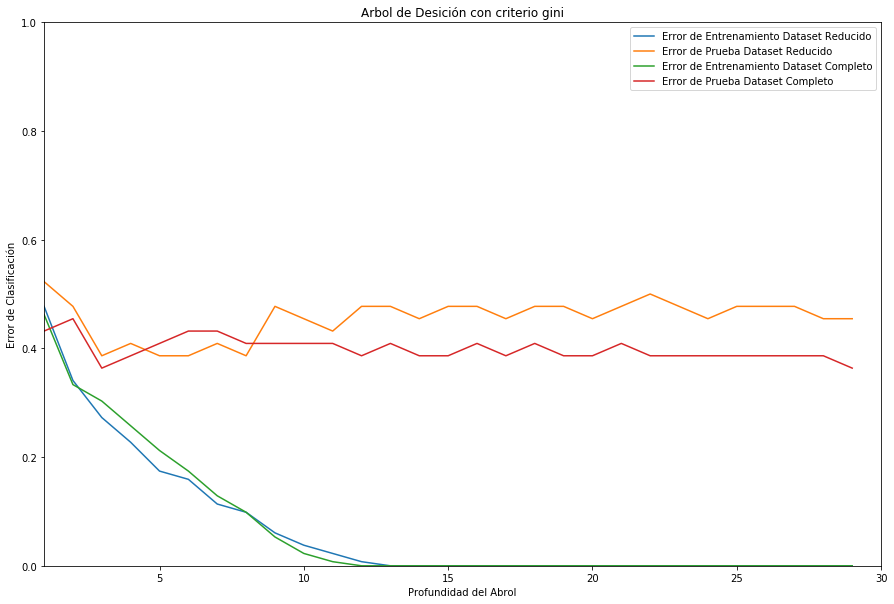

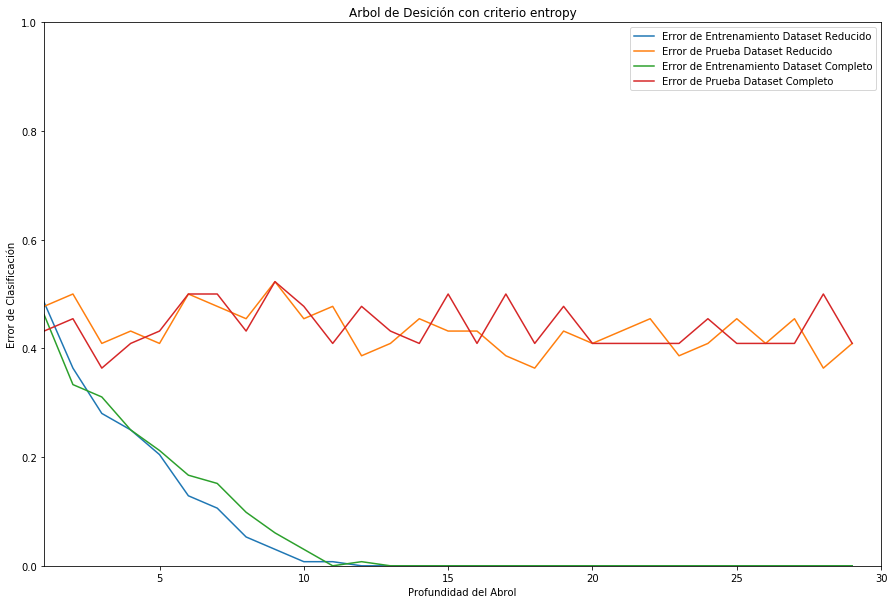

In [69]:
def plot_i(minimo, maximo,criterio):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_trainFULL= []
    error_testFULL = []
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=c,criterion=criterio,splitter='best')
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(profundidad, error_test, label='Error de Prueba Dataset Reducido')
    plot.plot(profundidad, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(profundidad, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    plt.xlabel('Profundidad del Abrol')
    plt.ylabel('Error de Clasificación')
    plt.title('Arbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()
plot_i(1,30,'gini')
plot_i(1,30,'entropy')

### Comparación

La diferencia entre los anteriores modelos (SVM, LR) en comparaciones a arboles de desición es muy grande. Arboles de desición en machine learning se basa en dividir en dos subsecciones conveniente mis datos para tener conjuntos mas pequeños(esto repetido una N cantidad de veces, donde N es el nivel de mi arbol). Para nuestro caso, si tomamos una profundidad de 30, el error de entrenamiento disminuye a 0 desde un valor de profundidad 11 en adelante, esto quiere decir que al llegar a una profundidad de 11 la maquina trae un gran overfitting, ya que solamente disminuye el error de entrenamiento pero el error de prueba se mantiene constante (si toamos el promedio de las mediciones se aproxima a una recta).
Respecto a las diferencias de SVM y LR es observable que no se logra disminuir considerablemente el error de prueba, por lo cual si presume un aumento del overfitting en la maquina a medida que aumenta la profundidad del arbol.
Por lo cual se concluye que arboles de desición no es una buena tecnica para este ejercicio, ya que no se logra disminuir el error de prueba ni con el metodo de maxima entropia ni con gini, por lo cual se recomienda usar otro metodo de entrenamiento.

(m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.


In [70]:
def plot_m(dimension,modelo,C_regularizador,kernels,profundidad):
    error_train = []
    error_test = []
    
    error_trainFULL = []
    error_testFULL = []

    
    dimensiones_auxiliar = range(1,dimension)
    arreglo_dimensiones = []
    if(modelo == 1):
        model=LR()
        model.set_params(C=C_regularizador,penalty='l2')
        
        modelFULL=LR()
        modelFULL.set_params(C=C_regularizador,penalty='l2')
        
    if(modelo == 2):
        model = SVM()
        model.set_params(C=C_regularizador,kernel=kernels)
        
        modelFULL = SVM()
        modelFULL.set_params(C=C_regularizador,kernel=kernels)
        
    if(modelo == 3):
        model= Tree()
        model.set_params(max_depth=profundidad,criterion=kernels,splitter='best')    
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=profundidad,criterion=kernels,splitter='best')   
        
    for dimensiones in range(1,dimension):
        pca_model = PCA(n_components=dimensiones)
        pca_model.fit(X_train)
        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        pca_modelFULL = PCA(n_components=dimensiones)
        pca_modelFULL.fit(X_trainFULL)
        X_pca_trainFULL = pca_modelFULL.transform(X_trainFULL)
        X_pca_testFULL = pca_modelFULL.transform(X_testFULL)
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        arreglo_dimensiones.append(dimensiones)
        
    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    
    plot.plot(arreglo_dimensiones, error_train, label='Error de Entrenamiento Dataset Reducido ')
    plot.plot(arreglo_dimensiones, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(arreglo_dimensiones, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(arreglo_dimensiones, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    if(modelo == 1):
        plt.title('Regresion Logistica con penalización l2')
    if(modelo == 2):
        plt.title('SVM con kernel '+kernels)
    if(modelo == 3):
        plt.title('Arboles con criterio '+kernels)
    plt.xlabel('Dimensiones')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(arreglo_dimensiones)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_m(30,1,20,'linear',2)

In [ ]:
plot_m(25,2,20,'linear',2)

In [ ]:
plot_m(25,2,20,'rbf',2)

In [ ]:
plot_m(20,3,20,'gini',5)

In [ ]:
plot_m(20,3,20,'gini',8)

In [ ]:
plot_m(20,3,20,'gini',11)

### Respuesta
En temas de dimensionalidad, todos los algoritmos tanto con el dataset completo o el reducido experimentan una disminución del error de clasificación tanto de entrenamiento como de prueba. Este se comporta distinto dependiendo de que modelo se ocupo:

1. Para Regresión Logistica con penalización l2, los errores de entrenamiento y de prueba disminuyeron considerablemente, sin quedar sumamente ajustados al modelo (ya que igual existe un gran margen de error), por lo cual confirma que este paso es un buen feature para la regresión logistica, incluso es tan bueno, que en algunos puntos el error del dataset reducido genera una mejor generalizacion y un menor error al momento de entrenar y testear la maquina.

2. Para SVM con kernel lineal, el comportamiento es similar a la regresión logistica incluso mejor al momento de analisar el error de prueba del dataset reducido, por otro lado, el kernel rbf ajusta mucho el modelo, tendiendo un error de entrenamiento muy pequeño en comparación con el de prueba, demostrado nuevamente que rbf ajusta demaciado este tipo de modelos (al igual que la parte 1 de la tarea)

3. para los arboles de clasificación, la profundidad del arbol tiene una directa implicancia con la dimensionalidad, esto se debe por que el primer corte que divide el dataset es respectivo a la dimensión mas importante, por lo cual a medida que quitamos dimensiones y realizamos la division, el error de entrenamiento se reduce extremadamente rapido, ajustando demaciado nuestro modelo a medida que quitamos dimensiones. Por otro lado si tenemos una profundidad pequeña (5 en nuestro caso) se logra tener un errores relativamente aceptables para considerable que la maquina no esta sobre ajustada y se puede apreciar que la curva de error con el dataset mas pequeño es mas representativo que el dataset completo, por lo cual generaliza mejor la maquina. 

(n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

In [ ]:
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

plt.scatter(X_pca_train[:,0] , X_pca_train[:,1], s=50, c=y_train, cmap=plt.cm.winter)
plt.title('Conjunto de entrenamiento')
plt.tight_layout()
plt.show()

plt.scatter(X_pca_test[:,0] , X_pca_test[:,1], s=50, c=y_test, cmap=plt.cm.winter)
plt.title('Conjunto de prueba')
plt.show()

Ya que LDA incluye un calculo de de la matrix inverso de varianza la cual la hace impresisa cuando el determinante es aproximadamente 0 (lo que infica que 2 o mas variables estan sumamente relacionadas o en otras palabras, son combinaciones lineales una de la otra), por lo cual se genera un warning que advierte que lo mas probable es que el resultado obtenido  estan bajo el efecto de variables linealmente dependientes (o col-lineares)

(o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.

In [ ]:
def ploteo_k(Cs, modelo,X_pca_train,X_pca_test,y_train,y_test,kernel): 
    error_train = []
    error_test = []
    error_trainFULL = []
    error_testFULL = []
    
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
        if(modelo == 1):
            model=LR()
            model.set_params(C=param,penalty='l2')
            model.fit(X_pca_train,y_train)
            
            modelFULL=LR()
            modelFULL.set_params(C=param,penalty='l2')
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        if(modelo ==2):
            model = SVM()
            model.set_params(C=param,kernel=kernel)
            model.fit(X_pca_train,y_train)
            
            modelFULL = SVM()
            modelFULL.set_params(C=param,kernel=kernel)
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))

    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(pasos, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(pasos, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(pasos, error_testFULL, label='Error de Prueba Dataset Completo')
    plt.legend()
    if(modelo == 1):
        plt.title('Regresion Logistica con penalización l2')
        plt.ylim(0, -0.4)
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()
        
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],1,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'rbf')

In [ ]:
def plot_i(minimo, maximo,criterio):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_trainFULL= []
    error_testFULL = []
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=c,criterion=criterio,splitter='best')
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(profundidad, error_test, label='Error de Prueba Dataset Reducido')
    plot.plot(profundidad, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(profundidad, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    plt.xlabel('Profundidad del Abrol')
    plt.ylabel('Error de Clasificación')
    plt.title('Arbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()
plot_i(1,30,'gini')
plot_i(1,30,'entropy')

In [ ]:
plot_m(30,1,20,'linear',2)

In [ ]:
plot_m(25,2,20,'linear',2)

In [ ]:
plot_m(25,2,20,'rbf',2)

In [ ]:
plot_m(20,3,20,'gini',5)

In [ ]:
plot_m(20,3,20,'gini',8)

Para los siguientes modelos:

1. Para la Regresión Logistica: Con la nueva reducción LDA no se tienen mucha variación al compararlo con el metodo PCA. El unico punto destacable es que los errores varian mas abruptamente.
2. Para SVM: SVM tanto lineal como brf no tubieron muchas variaciones en cuanto a los graficos y al igual que regresión logistica solamente se destaca los abruptos cambios en el error.
3. Arboles de Clasificación: Este modelo si fue afectado por LDA, ya que marco brechas mas grandes entre el error del dataset completo al reducido, logrando que el dataset reducido sea representativo o no en ciertos casos.

(p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

# 3. Análisis de emociones en tweets

In [4]:
import pandas as pd
import re
import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
nltk.download('stopwords')
import random
from sklearn.svm import LinearSVC

[nltk_data] Downloading package stopwords to /Users/nano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros
por clase y describa el dataset.

In [5]:
df = pd.read_csv('./text_emotion.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


(40000, 4)

In [6]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [7]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Como se puede apreciar:
1. el dataset cuenta con 40000 filas y 4 columnas
2. "tweet_id" representa el id (asignado por tweeter) que se le da a cierto comentario/publicación creado por cierto autor
3. "sentiment" es el sentimiento (etiqueta o label) que se le asigno previamente a cierto comentario/publicación, el cual puede ser neutral, worry, happiness, sadness, love, surpirse, fun, relief, hate, empty, enthusiasm, boredom o anger
4. "author" es el author del comentario/publicación
5. "content" es el comentario/publicación de cierto autor

Las etiquetas son emociones humanas que ya todos conocemos, por lo cual se omitara el paso de explicarlas.

Por ultimo, la cantidad de datos en cada etiqueta es:

    neutral       8638
    worry         8459
    happiness     5209
    sadness       5165
    love          3842
    surprise      2187
    fun           1776
    relief        1526
    hate          1323
    empty          827
    enthusiasm     759
    boredom        179
    anger          110

In [8]:
df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

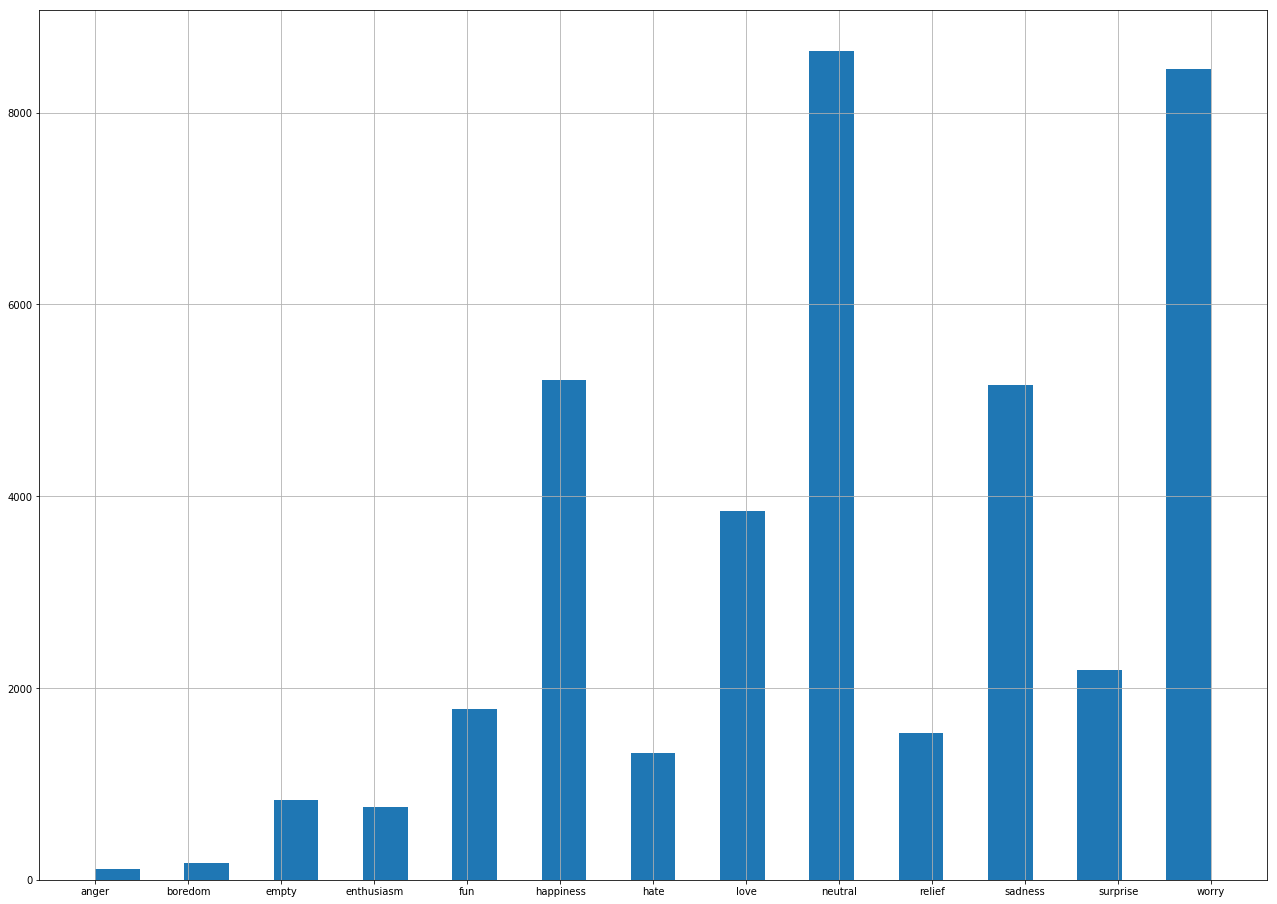

In [9]:
df['sentiment'].hist(bins=25, figsize=(22,16))
plt.show()

(b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para
verificar los resultados de los algoritmos.

In [10]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [11]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32044 entries, 0 to 39999
Data columns (total 2 columns):
sentiment    32044 non-null object
content      32044 non-null object
dtypes: object(2)
memory usage: 751.0+ KB


(32044, 2)

In [12]:
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 10 to 39994
Data columns (total 2 columns):
sentiment    7956 non-null object
content      7956 non-null object
dtypes: object(2)
memory usage: 186.5+ KB


(7956, 2)

### Comentario
Los datos estan acorde al 80% de los datos para el entrenamiento y el 20% restante para pruebas ya que por documentacion es la mejor distribucion simple para division de datos

(c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.


In [14]:
df = pd.read_csv('./text_emotion.csv')
df.sample(frac=0.5)
df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

In [15]:
stopwords = stopwords.words('english')
df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False)
df['content'] = df['content'].str.replace('@[^\s]+[\s]?', '', case=False)
df['content'] = df['content'].str.replace('\s?[0-9]+\.?[0-9]*', '', case=False)
df['content'] = df['content'].str.replace('Not Available', '', case=False)
for i in range(df.shape[0]):
    df['content'].values[i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",df['content'].values[i]).split())
    df['content'].values[i] = ' '.join(filter(lambda x: x.lower() not in stopwords,  df['content'][i].split()))



## Respuesta
para esta sección, la limpieza de los datos incluye:

1. Eliminación de caracteres especiales como ",", ":", "\"", "=", "&", ";", "%", etc.
2. Eliminacion de Urls.
3. Eliminación de numeros.
4. Eliminación de nombres de usuario.
5. Eliminación de secciones no disponibles.
6. Eliminación de Palabras vacías.

La explicación de cada eliminación se debe a que:

1. Los caracteres especial no denotan sentimiento alguno.
2. Las Urls no expresan sentimiento.
3. Numeros tampoco desmuestran algun tipo de sentimiento a menos que se incluyan en emojis, pero por simplicidad se eliminan.
4. Los nombres de usuario en el contenido del mensaje no son importantes para el analisis de sentimientos, ya que simplemente se puede saber por el resto del contenido del mensaje
5. Por simplicidad se eliminan estas secciones para dejar mas limpio el mensaje
6. Palabras que no aportan nada en el analisis de sentimientos(stopwords o Palabra vacía), como por ejemplo:

   able,about,across,among,an,and,any,but,by,can,cannot,could,dear,did,do,does,either,else,ever,got,had,has,have,he,her, etc


(d) Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.

Logica a trabajar:

    neutral       0
    worry         -1
    happiness     +1
    sadness       -1
    love          +1
    surprise      +1
    fun           +1
    relief        +1
    hate          -1
    empty         -1
    enthusiasm    +1
    boredom       -1
    anger         -1


In [14]:
mapping = {"happiness": 1,"love": 1,"surprise": 1,"fun": 1,"relief": 1,"enthusiasm": 1,'worry':-1,'sadness':-1,'hate':-1,'empty':-1,'boredom':-1,'anger':-1,'neutral':0}
df = df.replace({'sentiment': mapping})
df = df[df.sentiment != 0]
df['sentiment'].value_counts()

-1    16063
 1    15299
Name: sentiment, dtype: int64

### Comentario

Se observa que la diferencia de cantidad entre una clase y otra es de 764, lo cual es suficiente para clasificar correctamente sin problemas de baja representación.

(e) Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets {ti}_n_i=1 disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets. 
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (CountVectorizer
y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento,
para luego transformar el conjunto de pruebas (con el método transform).


In [15]:
X = df['content'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

frecuencia_terminos = TfidfVectorizer(lowercase=True)
X_train_vectorize = frecuencia_terminos.fit_transform(X_train) #Como indica el enunciado
X_test_vectorize = frecuencia_terminos.transform(X_test)       #Como indica el enunciado
X_train_vectorize = X_train_vectorize.toarray()
X_test_vectorize = X_test_vectorize.toarray()
pca_model = PCA(n_components = 10)
pca_model.fit(X_train_vectorize)
X_train_pca = pca_model.transform(X_train_vectorize)
X_test_pca = pca_model.transform(X_test_vectorize)

(f) Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria
(por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles
de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos
(entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

# Falta Graficar las funciones mediante lo realizado en la parte 2

# Regresión logística

In [16]:
models = []
model = LR()
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_LR_train = model.predict(X_train_vectorize)
# yhat_LR_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LR_train)))
# print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LR_test)))

model.fit(X_train_pca,y_train)
yhat_LR_train_pca = model.predict(X_train_pca)
yhat_LR_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LR_train_pca)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LR_test_pca)))

Miss Classification Error Train LR: 0.376174
Miss Classification Error Test LR: 0.369468


# SVM

In [17]:
model= SVM()
model.set_params(kernel='linear')
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_SVM_train = model.predict(X_train_vectorize)
# yhat_SVM_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_train, yhat_SVM_train)))
# print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_test, yhat_SVM_test)))

model.fit(X_train_pca,y_train)
yhat_SVM_train_pca = model.predict(X_train_pca)
yhat_SVM_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_train, yhat_SVM_train_pca)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_test, yhat_SVM_test_pca)))

Miss Classification Error Train SVM: 0.397942
Miss Classification Error Test SVM: 0.390129


# QDA

In [18]:
model = QDA()
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_QDA_train = model.predict(X_train_vectorize)
# yhat_QDA_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train QDA: %f"%(1-accuracy_score(y_train, yhat_QDA_train)))
# print("Miss Classification Error Test QDA: %f"%(1-accuracy_score(y_test, yhat_QDA_test)))

model.fit(X_train_pca,y_train)
yhat_QDA_train_pca = model.predict(X_train_pca)
yhat_QDA_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train QDA: %f"%(1-accuracy_score(y_train, yhat_QDA_train_pca)))
print("Miss Classification Error Test QDA: %f"%(1-accuracy_score(y_test, yhat_QDA_test_pca)))

Miss Classification Error Train QDA: 0.401003
Miss Classification Error Test QDA: 0.391659


# LDA

In [19]:
model = LDA()
models.append(model)
#model.fit(X_train_vectorize ,y_train)
#yhat_LDA_train = model.predict(X_train_vectorize)
#yhat_LDA_test = model.predict(X_test_vectorize)
#
#print("Miss Classification Error Train LDA: %f"%(1-accuracy_score(y_train, yhat_LDA_train)))
#print("Miss Classification Error Test LDA: %f"%(1-accuracy_score(y_test, yhat_LDA_test)))

model.fit(X_train_pca,y_train)
yhat_LDA_train_pca = model.predict(X_train_pca)
yhat_LDA_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train LDA: %f"%(1-accuracy_score(y_train, yhat_LDA_train_pca)))
print("Miss Classification Error Test LDA: %f"%(1-accuracy_score(y_test, yhat_LDA_test_pca)))

Miss Classification Error Train LDA: 0.380001
Miss Classification Error Test LDA: 0.374825


# DTree | Gini

In [20]:
model= Tree()
model.set_params(criterion='gini',splitter='best')
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_Tree_train = model.predict(X_train_vectorize)
# yhat_Tree_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train DT|Gini: %f"%(1-accuracy_score(y_train, yhat_Tree_train)))
# print("Miss Classification Error Test DT|Gini: %f"%(1-accuracy_score(y_test, yhat_Tree_test)))

model.fit(X_train_pca,y_train)
yhat_DTree_train_pca = model.predict(X_train_pca)
yhat_DTree_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train DTree: %f"%(1-accuracy_score(y_train, yhat_DTree_train_pca)))
print("Miss Classification Error Test DTree: %f"%(1-accuracy_score(y_test, yhat_DTree_test_pca)))

Miss Classification Error Train DTree: 0.007398
Miss Classification Error Test DTree: 0.407218


(g) Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?

In [21]:
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("Training Accuracy: %f"%(acc_tr))
    print("Test Accuracy: %f"%(acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))


In [23]:
for model in models:
    score_the_model(model, X_train_pca, y_train, X_test_pca, y_test)

Training Accuracy: 0.623826
Test Accuracy: 0.630485
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.60      0.86      0.71      4061
          -       0.72      0.39      0.50      3780

avg / total       0.66      0.63      0.61      7841

Training Accuracy: 0.602058
Test Accuracy: 0.609821
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.58      0.90      0.71      4061
          -       0.74      0.29      0.42      3780

avg / total       0.66      0.61      0.57      7841

Training Accuracy: 0.598997
Test Accuracy: 0.608291
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.58      0.90      0.70      4061
          -       0.73      0.30      0.42      3780

avg / total       0.65      0.61      0.57      7841

Training Accuracy: 0.619999
Test Accuracy: 0.625128
Detailed Analysis Testing Results

### Respuesta

Precision es el porcentaje de elementos de una clase que efectivamente pertenecen a ella. Recall es el porcentaje de elementos de una clase que fueron calificadas correctamente en ella. f1-score es el promedio armónico entre ambos valores y es mejor mientras mas cercano sea a 1. Support es la cantidad de elemntos en la clase.

Dado lo anterior, se observa el mejor rendimiento es dado por la regresión logística

(h) [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [ ]:
# test_pred = model.predict_proba(X_test_vectorize)
# spl = random.sample(range(len(test_pred)), 15)
# for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
#     print(sentiment, text)

(i) Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.

In [5]:
df = pd.read_csv('./text_emotion.csv')
df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevantestopwords = stopwords.words('english')
stopwords = stopwords.words('english')
df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False)
df['content'] = df['content'].str.replace('@[^\s]+[\s]?', '', case=False)
df['content'] = df['content'].str.replace('\s?[0-9]+\.?[0-9]*', '', case=False)
df['content'] = df['content'].str.replace('Not Available', '', case=False)
for i in range(df.shape[0]):
    df['content'].values[i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",df['content'].values[i]).split())
    df['content'].values[i] = ' '.join(filter(lambda x: x.lower() not in stopwords,  df['content'][i].split()))
mapping = {"neutral": 0, "happiness":  1, "love":  2, "surprise":  3, "fun":  4 , "relief": 5, "enthusiasm":  6, "worry": -1, "sadness": -2, "hate": -3, "empty": -4, "boredom": -5, "anger": -6}
df = df.replace({'sentiment': mapping})
df = df[df.sentiment != 0]
df['sentiment'].value_counts()

X = df['content'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

frecuencia_terminos = TfidfVectorizer(lowercase=True)
X_train_vectorize = frecuencia_terminos.fit_transform(X_train) #Como indica el enunciado
X_test_vectorize = frecuencia_terminos.transform(X_test)       #Como indica el enunciado
X_train_vectorize = X_train_vectorize.toarray()
X_test_vectorize = X_test_vectorize.toarray()
pca_model = PCA(n_components = 10)
pca_model.fit(X_train_vectorize)
X_train_pca = pca_model.transform(X_train_vectorize)
X_test_pca = pca_model.transform(X_test_vectorize)

### Observación

Se realizaron los pasos hechos en c) d) y e), donde la codificación fue la siguiente:

- neutral: 0
- happiness:  1
- love:  2
- surprise:  3
- fun:  4 
- enthusiasm:  5
- worry: -1
- sadness: -2
- relief: -3
- hate: -4
- empty: -5
- boredom: -6
- anger: -7

(j) Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada tweet, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

In [27]:
models = []

model= Tree()
model.set_params(criterion='gini',splitter='best')
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_Tree_train = model.predict(X_train_vectorize)
# yhat_Tree_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train DT|Gini: %f"%(1-accuracy_score(y_train, yhat_Tree_train)))
# print("Miss Classification Error Test DT|Gini: %f"%(1-accuracy_score(y_test, yhat_Tree_test)))

model.fit(X_train_pca,y_train)
yhat_DTree_train_pca = model.predict(X_train_pca)
yhat_DTree_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train DTree: %f"%(1-accuracy_score(y_train, yhat_DTree_train_pca)))
print("Miss Classification Error Test DTree: %f"%(1-accuracy_score(y_test, yhat_DTree_test_pca)))

model = LR()
models.append(model)
# model.fit(X_train_vectorize,y_train)
# yhat_LR_train = model.predict(X_train_vectorize)
# yhat_LR_test = model.predict(X_test_vectorize)
# 
# print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LR_train)))
# print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LR_test)))

model.fit(X_train_pca,y_train)
yhat_LR_train_pca = model.predict(X_train_pca)
yhat_LR_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_LR_train_pca)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_LR_test_pca)))

model = LinearSVC(multi_class="crammer_singer")
models.append(model)

model.fit(X_train_pca,y_train)
yhat_SVC_train_pca = model.predict(X_train_pca)
yhat_SVC_test_pca = model.predict(X_test_pca)

print("Miss Classification Error Train SVC: %f"%(1-accuracy_score(y_train, yhat_SVC_train_pca)))
print("Miss Classification Error Test SVC: %f"%(1-accuracy_score(y_test, yhat_SVC_test_pca)))

Miss Classification Error Train DTree: 0.021343
Miss Classification Error Test DTree: 0.787017
Miss Classification Error Train LR: 0.679478
Miss Classification Error Test LR: 0.680270
Miss Classification Error Train SVC: 0.835509
Miss Classification Error Test SVC: 0.835863


In [28]:
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("Training Accuracy: %f"%(acc_tr))
    print("Test Accuracy: %f"%(acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=["1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"]))
for model in models:
    score_the_model(model, X_train_pca, y_train, X_test_pca, y_test)

Training Accuracy: 0.978657
Test Accuracy: 0.212883
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          1       0.04      0.03      0.03        32
          2       0.03      0.02      0.02        49
          3       0.04      0.04      0.04       198
          4       0.07      0.07      0.07       333
          5       0.21      0.22      0.22      1324
          6       0.32      0.32      0.32      2125
         -1       0.24      0.25      0.24      1290
         -2       0.28      0.27      0.27       951
         -3       0.09      0.09      0.09       548
         -4       0.07      0.06      0.06       435
         -5       0.04      0.04      0.04       364
         -6       0.02      0.02      0.02       192

avg / total       0.21      0.21      0.21      7841

Training Accuracy: 0.320522
Test Accuracy: 0.319643
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          1       0.0

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Resultado

Se observa que el error de clasificacion de entrenamiento varía de métodos que lograron uno muy bajo, 3%, y otros con un error altísimo del orden del 75%. Respecto al error de testing, se observa que la gran mayoría tiene un error de clasificación alto, entre el 60% y 80%.

Adicionalemnte, se observa que el índice F1 en general fue bastante cercano a cero, del orden de 0.2 y 0.3.

Dado todo lo anterior, se puede ver que estos métodos tienden a overfitting, variando muchísimo el desempeño entre el conjunto de prueba y el de testing, siendo este último siempre peor.

(k) Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest [14]


In [ ]:
models = [SVM(C=2.5,kernel='linear')]

for model in models:
    oneVsRest = OneVsRestClassifier(model)
    oneVsRest.fit(X_train_vectorize, y_train)
    yhat_train_pca = oneVsRest.predict(X_test_vectorize)
    print("Miss Classification Error Train OneVsRest: %f"%(1-accuracy_score(X_test_vectorize, yhat_train_pca)))
    oneVsOne = OneVsOneClassifier(model)
    oneVsOne.fit(X_train_vectorize, y_train)
    yhat_train_pca = oneVsRest.predict(X_test_vectorize)
    print("Miss Classification Error Train OneVsOne: %f"%(1-accuracy_score(X_test_vectorize, yhat_train_pca)))

(l) Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

In [ ]:
LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')


(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos
mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?